## 군집화 실습 - 고객 세그멘테이션 (Customer Segmentation)

#### 고객 세그멘테이션
- 다양한 기준으로 고객을 분류하는 기법
- CRM이나 마케딩의 중요 기반 요소

#### 고객 분류 요소
- 개인 신상 데이터 기반 : 지역/결혼 여부 /성별 소등 등
- 상품 구매 정보 기반 : 더 중요한 분류 요소 (기업 입장에서
    - 어떤 상품을
    - 얼마나 많은 비용을 들여서
    - 얼마나 자주
- 얼마나 많은 매출을 발생시키는 것이 고객 기준을 정하는 중요한 요소

**고객 세그멘테이션 주요 목표 : 타켓마케팅**
- 고객의 상품 구매 이력에서 출발

**고객 세그멘테이션을 군집화**
- 고객의 어떤 요소를 기반으로 군집화할 것인가를 결정하는 것이 가장 중요
- 기본적인 고객 분석 요소인 RFM 기법 이용


#### RFM 기법
- Recency(R) : 가장 최근 상품 구입 일에서 오늘까지의 기간
- Frequency(F) : 상품 구매 횟수
- Monetary value(M) : 총 구매 금액


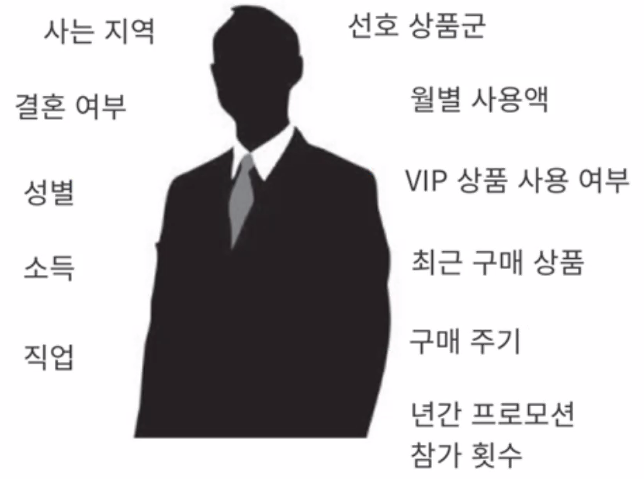

### 고객 세그멘테이션 예제 테이터 셋
- 온라인 판매 데이터를 기반으로
    - 고객 세그먼 테이션을 군집화 기반으로 수행
    
**사용 데이터**
- UCI : Machine Learning Repository에서 다운로드
- http://archive.ics.uci.edu/ml/datasets/online+retail
- Data Foler 클릭
- Online Retail.xslx
- 제품 주문 데이터 세트


### 고객 세그먼테이션 군집화 과정
1. 데이터셋 로딩과 데이터 클린징
    - 반품이나 CustomerID Null인 데이터는 제외
    - 영국 이외 국가의 데이터는 제외
    
    
2. RFM 기반 데이터 가공 
    - 구매 금액 데이터 생성
    - 고객 기준으로 RFM 가공
    
    
3. RFM 기반 고객 세그먼테이션
    - Recency, Frequency, Monetary 값의 분포도 확인
    - K-Means로 군집화 후에 실루엣 계수 평가
    - K-Means 군집화 후에 실루엣 계수 및 군집을 시각화
    - 로그 변환 후 재시각화


#### 데이터셋 로딩 / 전처리 작업

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel('./data/Online Retail.xlsx')


- 제품 주문 데이터 세트
- InvoiceNo : 주문번호
- StockCode : 제품코드
- 주문량, 주문일자, 제품단가, 주문고객번호, 주문고객국가

In [4]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
retail_df.describe()
## 수량이 (-)이유는 반품이라서 참고

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### 전처리 작업 필요

**CustomerID**
- 고객 세그먼테이션을 수행하므로
- 고객 식별 번호가 없는 데이터는 필요 없으므로 
- 삭제   


**그외 Data**
- Quantity와 UnitPrice에 음수값 존재 (반환)
- InvoiceNo : C (반환)
- 삭제


**반품이나 CustomerID가 Null인 데이터는 제외, 영국 이외 국가의 데이터는 제외**

In [7]:
retail_df=retail_df[retail_df['Quantity']>0]
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]

In [8]:
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# 주문 고객 국가별 주문수 확인
retail_df['Country'].value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

**영국이 대다수를 차지하므로 영국 데이터만 사용**

In [10]:
## 영국만 선택
retail_df = retail_df[retail_df['Country']== 'United Kingdom']
print(retail_df.shape)
# 최종데이터 : 354321건

(354321, 8)


#### RFM 기반 데이터 가공
- 구매금액 생성

In [11]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
# 구매금액 
retail_df['sale_amount']=retail_df['Quantity']*retail_df['UnitPrice']

In [13]:
## CustomerID의 식별을 편리하게 하기위해 int형으로 변환
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [14]:
## 고객별 주문액 상위 5위 확인
retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5]
# 특정 고객의 주문 금액이 많음
# 소매점의 주문이 많아서

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64

- 전형적인 판매 데이터 세트와 같이 주문번호(InvoiceNo) + 상품코드(StockCode)가 식별자로 되어 있음
- InvoiceNo + StockCode로 그룹화 수행하면 거의 유일한 식별자 레벨이 될 수 있음
    - 개수의 평균이 1에 가까운 수치로 나옴

In [15]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

#### but, 지금 수행하려는 RFM 기반의 고객 세그먼테이션은  
- 고객 레벨로 주문기간, 주문횟수, 주문금액 데이터를 기반으로 해서 세그먼테이션 수행

- 따라서, 주문번호+상품코드 기준의 데이터를   
    - 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경 필요

1. 주문번호 기준의 데이터를 개별 고객 기준의 데이터로 Group by 수행  
    - 현재의 retail_df 데이터 프레임에 CustomerID로 Group by해서 CustomerID 기준으로 데이터 프레임 새롭게 생성



참고 . 그런데 DataFrame의 groupby()만 사용해서  
여러 개의 칼럼에 서로 다른 aggregation (count()나 max()) 연산을 한 번에 수행하기 어려움  
DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용


**고객 기준으로 Recency, Frequency, Monetary가공**

In [25]:
# Recency(R) : 가장 최근 상품 구입 일에서 오늘까지의 기간
#     - InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency(F) : 상품 구매 횟수 (InvoiceNo 컬럼의 count())
# Monetary value(M) : 총 구매 금액 (sale_amount 컬럼의 sum())

aggregations = {
    'InvoiceDate':'max',#가장 최근 구매일
    'InvoiceNo':'count',#총 구맨건수
    'sale_amount':'sum'
}

retail_df.groupby('CustomerID').agg(aggregations) ## 수행할 내용을 딕셔너리로 넘겨서 수행하게 만들어줌


,InvoiceDate,InvoiceNo,sale_amount
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34
...,...,...,...
18280,2011-03-07 09:52:00,10,180.60
18281,2011-06-12 10:53:00,7,80.82
18282,2011-12-02 11:43:00,12,178.05


In [26]:
### RFM 요인을 변수로 갖고 있는 DF 생성
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()

# Recency - 가장 최근 구매일이기 때문에 가공을 더 진행해야 함

In [27]:
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


**Recency를 날짜에서 정수형으로 가공**
- 온라인 판매기간을 기준으로 가장 최근 주문일로부터 얼마나 지났는지를 계산하여 필드 생성
- Recency = 오늘 날짜 - 가장 죄근 주문일
- 온라인 판매 데이터 판매 기간 확인
    - 2010-12-01 ~ 2011-12-09
    - 따라서 오늘은 하루 더해서 2011-12-10로 설정


#### 온라인 판매기간 확인

In [28]:
retail_df['InvoiceDate'].min()
retail_df['InvoiceDate'].max()

Timestamp('2010-12-01 08:26:00')

Timestamp('2011-12-09 12:49:00')

In [29]:
## 오늘 : 2011-12-10

import datetime as dt

dt.datetime(2011,12,10)-cust_df['Recency']
# days가 0이 나오므로 1을 더해서 가장 최근일을 1일전으로 생성

0      325 days 13:59:00
1        2 days 09:26:00
2        0 days 11:40:00
3        3 days 14:04:00
4        3 days 08:48:00
              ...       
3915   277 days 14:08:00
3916   180 days 13:07:00
3917     7 days 12:17:00
3918     3 days 11:58:00
3919    42 days 14:31:00
Name: Recency, Length: 3920, dtype: timedelta64[ns]

In [30]:
cust_df['Recency'] = dt.datetime(2011,12,10)-cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1) # 1을 더함
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### RFM 기반 고객 세그먼테이션
**Recency, Frequency, Monetary 값의 분포도 확인**


#### 온라인 판매 데이터 세트
- 개인 고객 주문 + 소매점 주문
- 소매점 주문이 개인 고객 주문과 매우 큰 차이가 있기 때문에
- 매우 왜곡된 데이터 분포를 가지게 되어
- 군집화가 한쪽 군집에만 집중되는 현상 발생
- 이처럼 왜곡된 데이터 분포에서 군집화를 수행할 때 
- 어떤 현상이 발생하는지 확인


Text(0.5, 1.0, 'Recency')

(array([1701.,  728.,  331.,  215.,  208.,  179.,  170.,  153.,  120.,
         115.]),
 array([  1. ,  38.3,  75.6, 112.9, 150.2, 187.5, 224.8, 262.1, 299.4,
        336.7, 374. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Frequency')

(array([3.894e+03, 1.800e+01, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 7.8560e+02, 1.5702e+03, 2.3548e+03, 3.1394e+03,
        3.9240e+03, 4.7086e+03, 5.4932e+03, 6.2778e+03, 7.0624e+03,
        7.8470e+03]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Monetary')

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

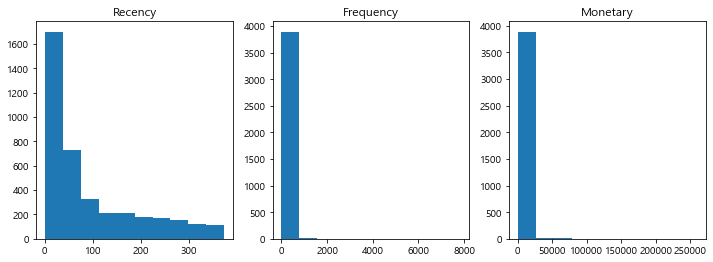

In [31]:
# 히스토그램 확인 
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)

ax1.set_title('Recency')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary')
ax3.hist(cust_df['Monetary'])

#### 결과
- Recency, Frequency, Monetary 모두 왜곡된 데이터 값 분포도를 나타냄
- 특히 Frequency, Monetary의 경우 특정 범위에 값이 몰려 있어서 왜곡 정도가 매우 심함


In [32]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


### K-Means로 군집화 후에 실루엣 계수 평가 (왜곡정도가 심한 데이터를 그대로 사용)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [34]:
# 군집화 수행 : 군집 3개로 구성
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(cust_df)
cust_df['cluster_label']=labels

In [35]:
print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(cust_df,labels)))

실루엣 스코어는 : 0.932


### 결과 : 0.932
- 이상치에 반응해서 과적합이 이루어짐

왜곡 정도가 매우 높은 데이터 세트에 K-평균 군집을 적용하면  
중심의  갯수를 증가시키더라도 변별력이 떨어지는 군집화가 수행됨  

그래서 먼저 평균과 표준편차 재조정한 뒤에 K-평균 수행


In [36]:
# 표준화 변환 수행
X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

In [37]:
# 군집화 수행 : 군집 3개로 구성
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

In [38]:
print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.592


**K-Means 군집화 후에 실루엣 계수 및 군집을 시각화**

visualize_silhouette() 함수와 visualize_kmeans_plot_multi() 함수 사용 
- visualize_silhouette() : 군집 개수를 변화시키면서 K-평균 군집을 수행했을 때
    - 개별 군집별 평균 실루엣 계수값 시각화하는 함수 (앞에서 사용했음)
- visualize_kmeans_plot_multi() : 군집 개수별로 군집화 구성을 시각화하는 함수


In [39]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

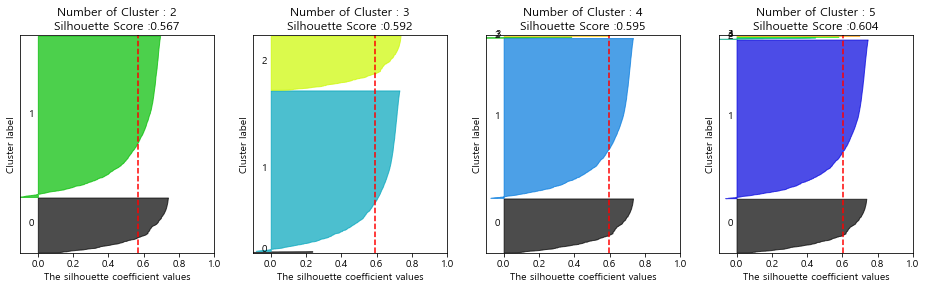

In [95]:
visualize_silhouette([2,3,4,5],X_features_scaled)

#### 그래프 결과
- 군집 2개
    - 데이터가 평균 계수보다 높은 포인트들이 많이 있지만 1번 군짐의 범위가 너무 넒어서 데이터가 객관적으로 보임
- 군집 3~5개
    - 데이터의 양이 너무 작은 군집들이 만들어짐

**데이터 왜곡 정도를 낮추는 로그 변환 진행후 군집-시각화**

In [40]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


In [41]:
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])


# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)


In [42]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))


실루엣 스코어는 : 0.303


### 결과
- 실루엣 스코어는 로그 변환하기 전보다 떨어짐
- 절대치보다 개별군집의 균이도를 같이 확인해야 함

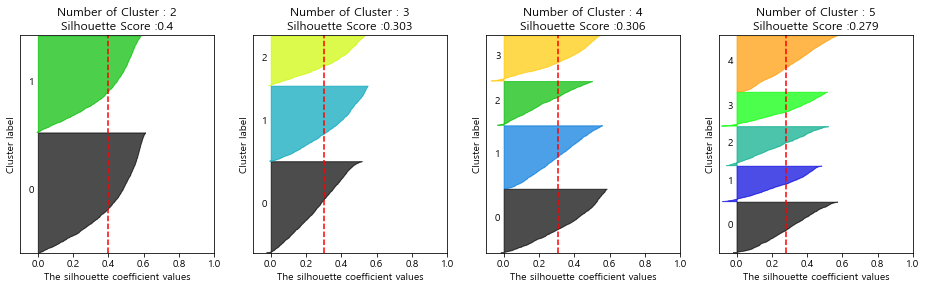

In [43]:
# 로그 변환된 데이터 세트를 기반으로 실루엣 계수와 군집화 구성 시각화

visualize_silhouette([2,3,4,5],X_features_scaled)


### 결과
- 실루엣스코어는 로그변환하기 전보다 더 떨어졌지만
- 더 균일하게 군집화 구성이 되었음

**왜곡된 데이터셋에 대해서는 로그변환 후 표준 변환을 진행하고 군집화를 수행하면 더 나은 결과를 도출할 수 있음**